# Background Subtraction Guide
![](img/step.png)
![](img/step2.png)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

bg_img = cv.imread('img/bg_image.png')
bg_green = cv.imread('img/bg_green.png')
obj_img = cv.imread('img/obj_bg.png')

## Compute Differences

(1080, 1920)


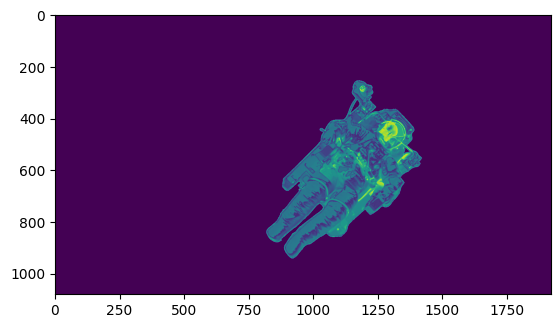

In [88]:
def computeDifference(bg_img, obj_img):
    # compute diff across 3 color channel rgb
    diff_three_channel = np.abs(bg_img - obj_img)
    
    # convert to 3 channel to 1 color
    # axis0: depth, axis1: row, axis2: column
    diff_single_channel = np.sum(diff_three_channel, axis=2) / 3.0 # divide the entire column
    
    diff_single_channel = diff_single_channel.astype('uint8')
    
    return diff_single_channel

diff = computeDifference(bg_green, obj_img)
print(diff.shape)
plt.imshow(diff)

## Create Masking 

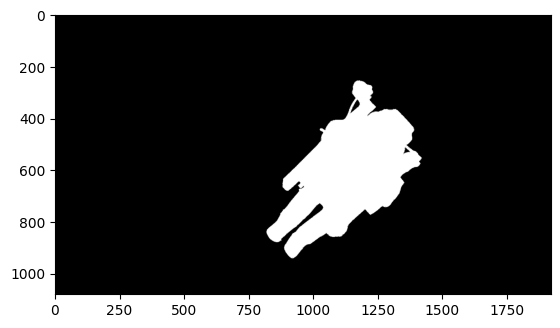

In [99]:
test_difference_single_channel = np.array([
    [5, 10, 20],
    [25, 40, 10],
    [5, 5, 5],
], dtype=np.uint8)

def computeBinaryMask(different_single_channel, threshold=15):
    #? replace all value smaller than threshold then 0 (white) otherwise 255 (black)
    difference_binary = np.where(different_single_channel < threshold, 0, 255)
    
    #! Duplicate each color value of each channel 3 times
    #? To match the expected RG format for futher processig, np.stack() used to replicate the 
    #? binary mask across 3 channels (axis=-1 creates an additional depth dimension for RGB)
    stacked_channel = np.stack((difference_binary, )*3, axis=-1)
    
    return stacked_channel
    
mask = computeBinaryMask(diff)
# print(mask)
plt.imshow(mask)

## Replace Background

In [100]:
def replaceBackGround(bg_img, bg_green, ob_img):
    #? compute diff
    diff_single_channel = computeDifference(bg_green, ob_img)
    
    #? compute binary mask
    binary_mask = computeBinaryMask(diff_single_channel)
    
    #? replace background
    output = np.where(binary_mask==255, ob_img, bg_img)
    
    return output


# Preview

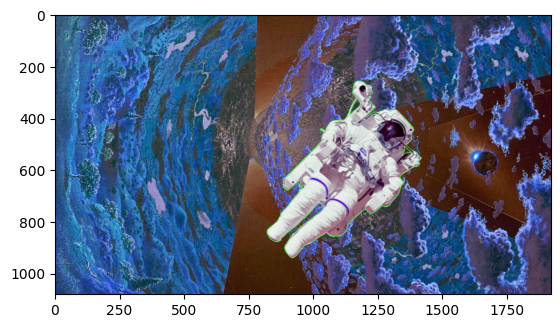

In [101]:
bg_img = cv.imread('img/bg_image.png')
bg_green = cv.imread('img/bg_green.png')
obj_img = cv.imread('img/obj_bg.png')

output = replaceBackGround(bg_img, bg_green, obj_img)
plt.imshow(output)    

In [108]:
import numpy as np

arr1 = np.array([[2, 3], [2, 4]])
arr2 = np.array([[5, 5], [4, 5]])

# stacked_arr = np.stack((arr1, arr2), axis=1)
# print(stacked_arr)
print(arr1 + arr2)


[[7 8]
 [6 9]]
